# TOPIC: RED WINE QUALITY 

In [75]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
dataset= pd.read_csv('C:/Users/User/Desktop/Data Scientist/365 Data Science Projects/winequality-red.csv')

# problem statement:

--- Use machine learning to determine which physiochemical properties make a wine 'good'!

# objective:

---- To experiment with different classification methods to see which yields the highest accuracy
---- To determine which features are the most indicative of a good quality wine

In [77]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
dataset.shape

(1599, 12)

In [50]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [51]:
dataset.duplicated().sum()

240

In [52]:
dataset[dataset.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [53]:
for i in dataset.columns:
    print(i, len(dataset[i].unique()))

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


In [54]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

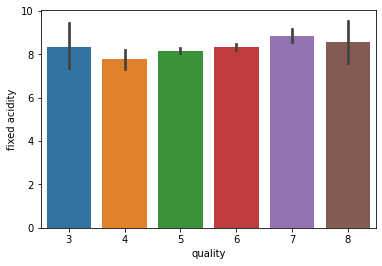

In [55]:
sns.barplot(x= 'quality', y= 'fixed acidity', data= dataset)
plt.show()

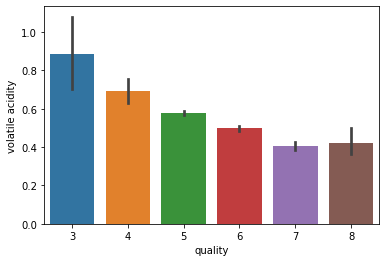

In [88]:
sns.barplot(x= 'quality', y= 'volatile acidity', data= dataset)
plt.show()

In [ ]:
# 8 have low volatile acidity 

In [27]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

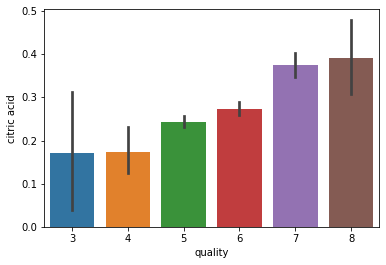

In [29]:
sns.barplot(x= 'quality', y= 'citric acid', data= dataset)
plt.show()

In [ ]:
# 8 have higher citric acid

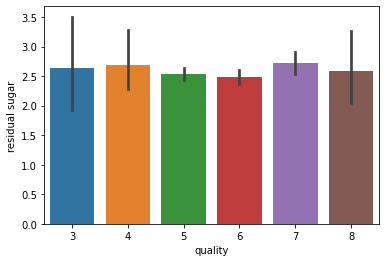

In [30]:
sns.barplot(x= 'quality', y= 'residual sugar', data= dataset)
plt.show()

In [ ]:
# 8 have lower residual sugar

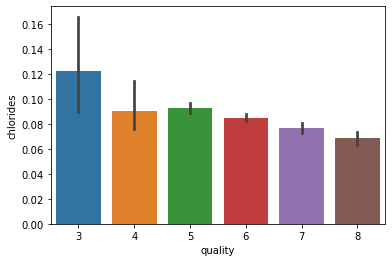

In [31]:
sns.barplot(x= 'quality', y= 'chlorides', data= dataset)
plt.show()

In [ ]:
# 8 have lower chloride

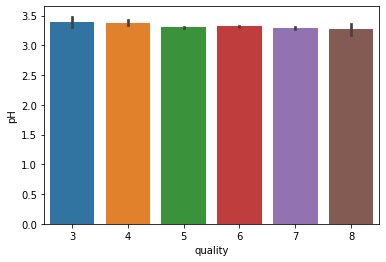

In [32]:
sns.barplot(x= 'quality', y= 'pH', data= dataset)
plt.show()

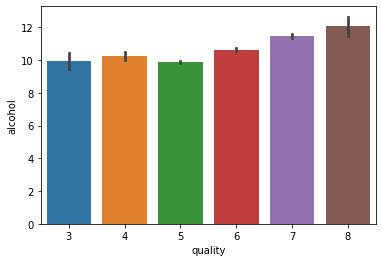

In [35]:
sns.barplot(x= 'quality', y= 'alcohol', data= dataset)
plt.show()

In [ ]:
#8 have higher % of alcohol

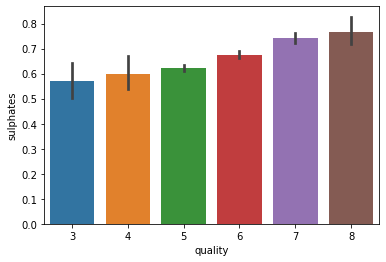

In [37]:
sns.barplot(x= 'quality', y= 'sulphates', data= dataset)
plt.show()

In [ ]:
# 8 have higher % of sulphate

In [56]:
correlation= dataset.corr()

In [57]:
correlation['quality'].sort_values(ascending= False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [12]:
# mildly correlated to quality are alcohol, sulphates, citric acid

In [78]:
# divide into good and bad quality of alcohol
dataset['goodquality']= [1 if x>=7 else 0 for x in dataset['quality']]

In [79]:
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [80]:
dataset['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [81]:
# unbalanced dataset, using smote we can balance the dataset

In [82]:
dataset= dataset.drop('quality', axis= 1)

In [83]:
correlation= dataset.corr()

In [84]:
correlation['goodquality'].sort_values(ascending= False)

goodquality             1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: goodquality, dtype: float64

In [ ]:
# now more correlated is alcohol and sulphates

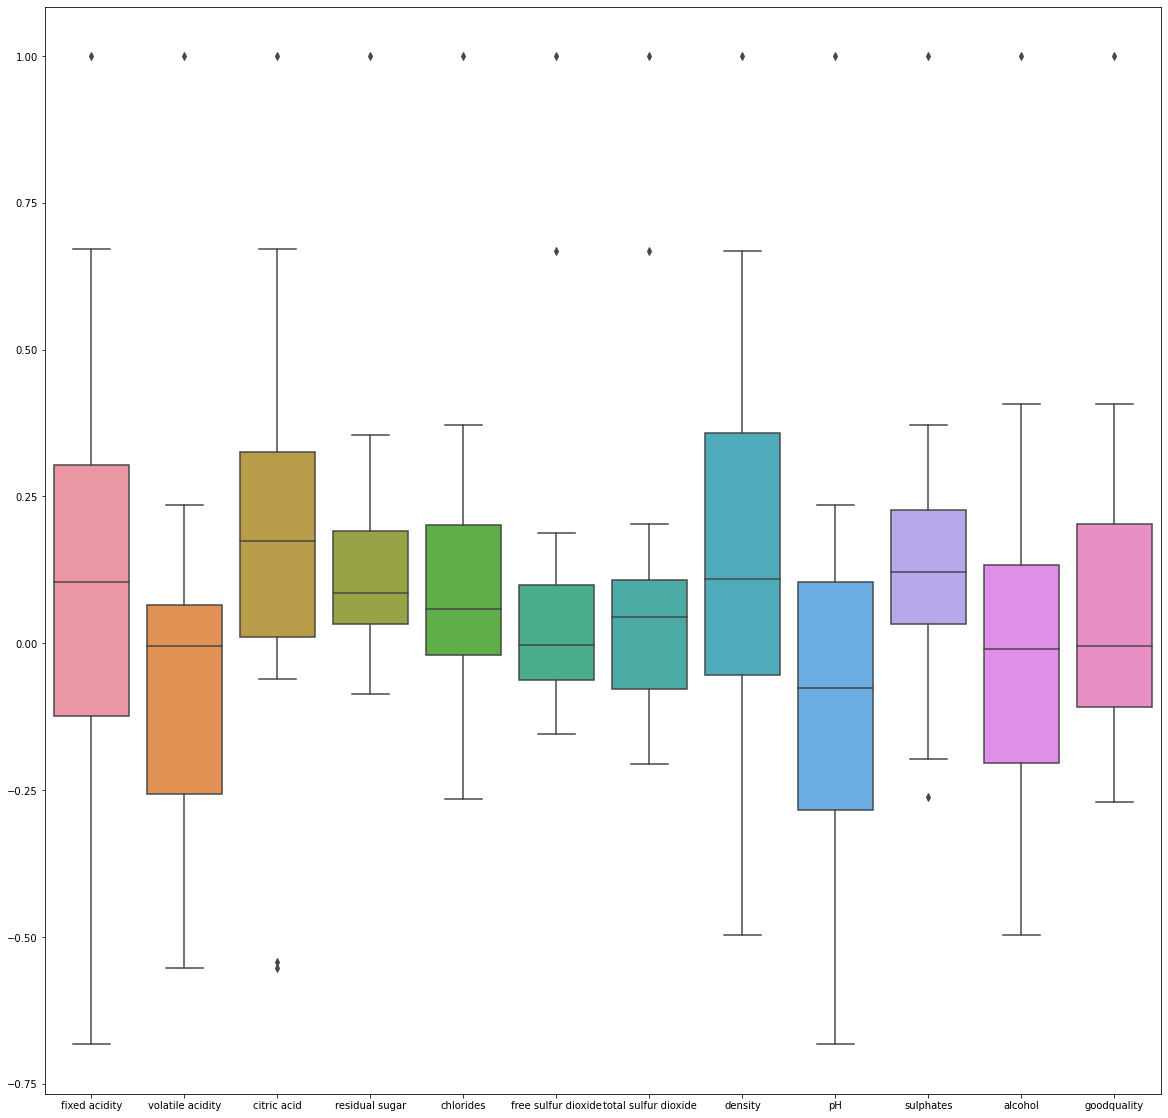

In [51]:
plt.figure(figsize= (20,20))
sns.boxplot(data= dataset)
plt.show()

In [ ]:
# not so many outlier

In [97]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [85]:
#splitting into x and y 
x = dataset.drop(['goodquality'], axis= 1)
y= dataset.iloc[:, -1].values

In [86]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [88]:
#using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state= 0)
print('original dataset', Counter(y))
sm= SMOTE(random_state= 42)
x_ovr, y_ovr= sm.fit_resample(x_train, y_train)
print('After over sampling', Counter(y_ovr))

original dataset Counter({0: 1382, 1: 217})
After over sampling Counter({0: 1027, 1: 1027})


In [89]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'goodquality'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


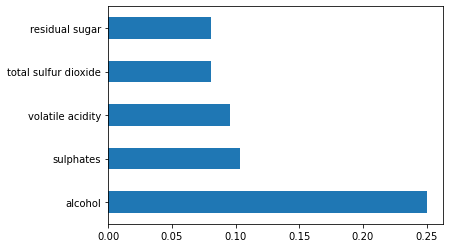

In [90]:
# feature importance 
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(x,y)
feat_import= pd.Series(model.feature_importances_, index= x.columns)
feat_import.nlargest(5).plot(kind= 'barh')
plt.show()


In [67]:
# the quality of wine mostly affected by alcohol and followed by sulphates, volatile acidity

In [68]:
dataset.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
goodquality                0.117366
dtype: float64

In [ ]:
# var is higher so need to do scaling 

In [ ]:
# x_train= x_ovr
#y_train= y_ovr

In [91]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_ovr= sc.fit_transform(x_ovr)
x_test= sc.transform(x_test)

In [93]:
# BUILDING MODEL 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
dec_cls= DecisionTreeClassifier(random_state= 51)
dec_cls.fit(x_train_ovr, y_ovr)
y_pred1= dec_cls.predict(x_test)
accuracy_score(y_test, y_pred1)
print(classification_report(y_test, y_pred1))
print(mean_squared_error(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       355
           1       0.33      0.64      0.43        45

    accuracy                           0.81       400
   macro avg       0.64      0.74      0.66       400
weighted avg       0.88      0.81      0.83       400

0.19


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
rand_cls= RandomForestClassifier(random_state= 1)
rand_cls.fit(x_train_ovr, y_ovr)
y_pred2= rand_cls.predict(x_test)
accuracy_score(y_test, y_pred2)
confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))
print(mean_squared_error(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       355
           1       0.47      0.82      0.60        45

    accuracy                           0.88       400
   macro avg       0.72      0.85      0.76       400
weighted avg       0.92      0.88      0.89       400

0.125


In [98]:
confusion_matrix(y_test, y_pred2)

array([[313,  42],
       [  8,  37]], dtype=int64)

In [96]:
from xgboost import XGBClassifier
xgb_cls= XGBClassifier(random_state= 1)
xgb_cls.fit(x_train_ovr, y_ovr)
y_pred3= xgb_cls.predict(x_test)
accuracy_score(y_test, y_pred3)
print(classification_report(y_test, y_pred3))
print(mean_squared_error(y_test, y_pred3))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       355
           1       0.51      0.78      0.62        45

    accuracy                           0.89       400
   macro avg       0.74      0.84      0.78       400
weighted avg       0.92      0.89      0.90       400

0.1075


In [99]:
confusion_matrix(y_test, y_pred3)

array([[322,  33],
       [ 10,  35]], dtype=int64)

In [100]:
from sklearn.ensemble import AdaBoostClassifier
ada_cls= AdaBoostClassifier(random_state= 1)
ada_cls.fit(x_train_ovr, y_ovr)
y_pred4= ada_cls.predict(x_test)
accuracy_score(y_test, y_pred4)
print(classification_report(y_test, y_pred4))
print(mean_squared_error(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       355
           1       0.36      0.78      0.49        45

    accuracy                           0.82       400
   macro avg       0.66      0.80      0.69       400
weighted avg       0.90      0.82      0.85       400

0.18


In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gra_cls= GradientBoostingClassifier(random_state= 1)
gra_cls.fit(x_train_ovr, y_ovr)
y_pred5= gra_cls.predict(x_test)
accuracy_score(y_test, y_pred5)
print(classification_report(y_test, y_pred5))
print(mean_squared_error(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       355
           1       0.40      0.84      0.55        45

    accuracy                           0.84       400
   macro avg       0.69      0.84      0.73       400
weighted avg       0.91      0.84      0.86       400

0.1575


In [ ]:
# XGBoostClassifier have the highest F1 score for goodquality wine(1) and lowest error
# the quality of wine mostly affected by alcohol and followed by sulphates, volatile acidity
# goodquality wine(1) have higher % of alcohol, sulphate and lower volatile acidity 